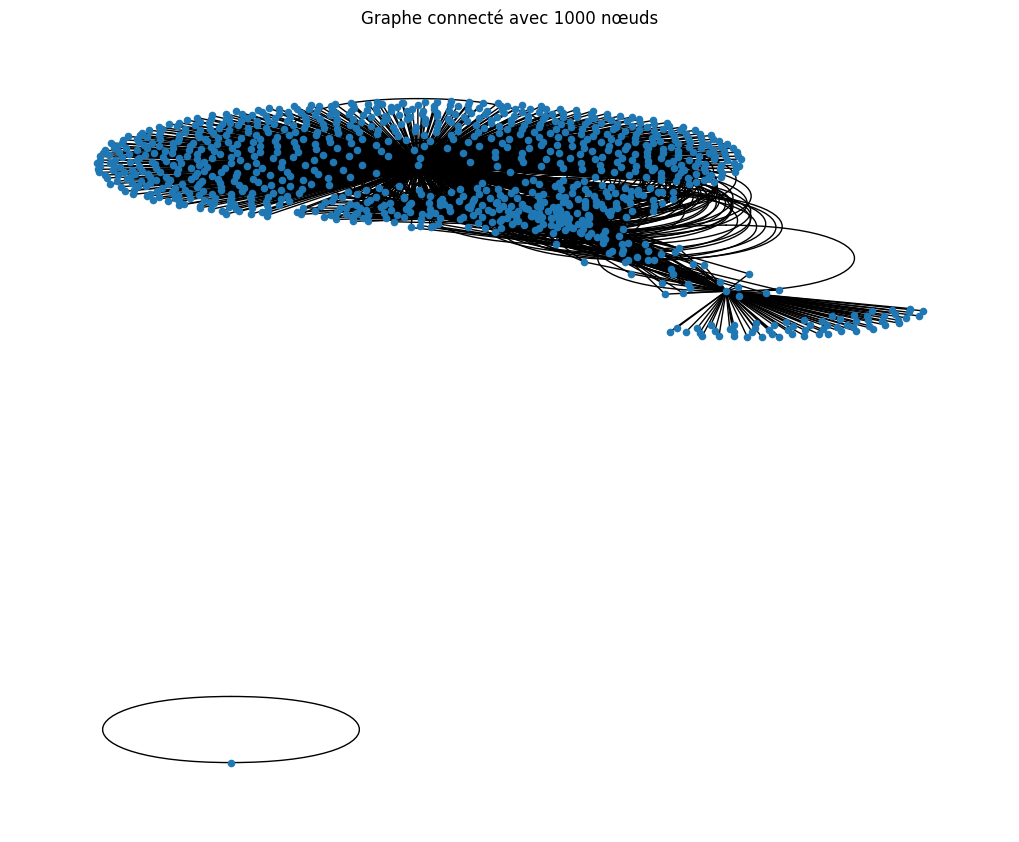

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Charger le graphe à partir du fichier MTX
def read_mtx_graph(file_path):
    G = nx.Graph()
    with open(file_path, "r") as file:
        for line in file:
            if line.startswith("%"):  # Ignorer les lignes de commentaire
                continue
            elif line.startswith("%%"):  # Marque le début de la matrice
                continue
            else:
                node1, node2 = map(int, line.strip().split()[:2])  # Lire les arêtes du graphe
                G.add_edge(node1, node2)
    return G

# Chargement du graphe à partir du fichier MTX
mtx_file = "/content/sample_data/email-EuAll.mtx"
G = read_mtx_graph(mtx_file)

# Réduire le nombre de nœuds à 1000
nodes_to_keep = list(G.nodes())[:1000]
G = G.subgraph(nodes_to_keep)

# Afficher le graphe connecté
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Layout pour placer les nœuds
nx.draw(G, pos, node_size=20)
plt.title("Graphe connecté avec 1000 nœuds")
plt.show()


In [6]:
import networkx as nx
import numpy as np
import scipy.io
from sklearn.metrics import roc_auc_score

# Charger le graphe à partir du fichier MTX
def read_mtx_graph(file_path):
    G = nx.Graph()
    with open(file_path, "r") as file:
        for line in file:
            if line.startswith("%"):  # Ignorer les lignes de commentaire
                continue
            elif line.startswith("%%"):  # Marque le début de la matrice
                continue
            else:
                node1, node2 = map(int, line.strip().split()[:2])  # Lire les arêtes du graphe
                G.add_edge(node1, node2)
    return G

# Chargement du graphe à partir du fichier MTX
mtx_file = "/content/sample_data/email-EuAll.mtx"
G = read_mtx_graph(mtx_file)

# Analyse de la distribution des degrés
degree_distribution = [d for n, d in G.degree()]
print("Distribution des degrés:")
print("Degré minimum:", min(degree_distribution))
print("Degré maximum:", max(degree_distribution))
print("Degré moyen:", np.mean(degree_distribution))

# Analyse des composants connectés
connected_components = nx.number_connected_components(G)
print("Nombre de composants connectés:", connected_components)

# Vérifier si le graphe est connecté avant de calculer le diamètre
if connected_components == 1:
    print("Diamètre du graphe:", nx.diameter(G))
# Coefficient de clustering et analyse de densité
clustering_coefficient = nx.average_clustering(G)
density = nx.density(G)
print("Coefficient de clustering moyen:", clustering_coefficient)
print("Densité du graphe:", density)

# Analyse de la centralité
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Centralité des nœuds:")
for node, centrality_value in sorted_centrality[:5]:
    print("Noeud:", node, "- Centralité:", centrality_value)

# Détection des communautés avec l'algorithme de k-clique
kclique_communities = list(nx.find_cliques(G))
print("Nombre de communautés détectées avec K-clique:", len(kclique_communities))

# Détection des communautés avec l'algorithme de propagation des labels
label_propagation_communities = list(nx.algorithms.community.label_propagation.label_propagation_communities(G))
print("Nombre de communautés détectées avec propagation des labels:", len(label_propagation_communities))

# Nous supposerons que nous avons un ensemble de liens manquants pour les tests.
train_graph, test_graph = nx.Graph(), nx.Graph()
train_graph.add_nodes_from(G.nodes())
for edge in G.edges():
    if np.random.rand() < 0.8:  # 80% des liens pour l'ensemble de formation
        train_graph.add_edge(*edge)
    else:  # 20% pour l'ensemble de test
        test_graph.add_edge(*edge)

# Prédiction des liens manquants avec le score de Jaccard
predicted_edges = []
for node in test_graph.nodes():
    neighbors = set(train_graph.neighbors(node))
    non_neighbors = set(train_graph.nodes()) - neighbors - {node}
    scores = [(n, len(neighbors & set(train_graph.neighbors(n))) / len(neighbors | set(train_graph.neighbors(n)))) for n in non_neighbors]
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    predicted_edges.extend([(node, n) for n, _ in sorted_scores[:3]])  # Prédire les 3 liens les plus probables


Distribution des degrés:
Degré minimum: 1
Degré maximum: 7636
Degré moyen: 2.7568001689201926
Nombre de composants connectés: 15836
Coefficient de clustering moyen: 0.06708495948944616
Densité du graphe: 1.039466454857112e-05
Centralité des nœuds:
Noeud: 179171 - Centralité: 0.02879195212904345
Noeud: 423 - Centralité: 0.023788426660834874
Noeud: 31 - Centralité: 0.022634637065302228
Noeud: 73 - Centralité: 0.016251088747535
Noeud: 299 - Centralité: 0.01504074083849585
Nombre de communautés détectées avec K-clique: 377956
Nombre de communautés détectées avec propagation des labels: 18233


ZeroDivisionError: division by zero